<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/Image_Processing_edit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Canny edge detector
The **Canny edge detector**
5 step

1. Noise reduction;
2. Gradient calculation;
3. Non-Maximum suppression;
4. Double threshold;
5. Edge tracking by hysterisis;

In [1]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


## 자율주차시험팀

For Image Processing **Serminar**


## 1. Noise Reduction
One way to get rid of the noise on the image, is by applying Gaussian blur to smooth it. To do so, image convolution technique is applied with a Gaussian Kernel (3x3, 5x5 etc). The kernel size depend on the expected blurring effect.
Basically, the smaller is the kernel, the less visible is the blur.
In our exmple, we will use a 5 by 5 Gausiaan kernel.

\begin{equation*}
G_{i,j} = \frac{1}{2 \pi \sigma^2}
exp \left(-\frac{(i-k)^2 + (j-k)^2}{2 \sigma^2}
\right) ; 0 \le i, j \le 2k
\end{equation*}


In [3]:
import numpy as np

def gaussian_kernel(size, sigma = 1):
  hsize = int(size) // 2
  x, y = np.mgrid[-hsize:hsize+1, -hsize:hsize+1]
  normal = 1 / (2.0 * np.pi * sigma**2)
  g = np.exp(-((x**2 + y**2)/(2.0*sigma**2))) * normal
  return g
  
print ("Define gaussin_kernel")

Define gaussin_kernel


In [13]:
g2 = gaussian_kernel(5,1.4)

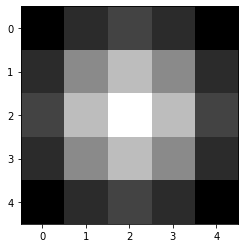

In [14]:
# for testing
from matplotlib import pyplot as plt
plt.imshow (g2, cmap = 'gray')


After applying the Gaussian blur, we get the following result:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


Text(0.5, 0.01, '(a) Original Image, and (b) Blurred Image with a Gaussian filter (sigma=1.4, kernel size of 5x5)')

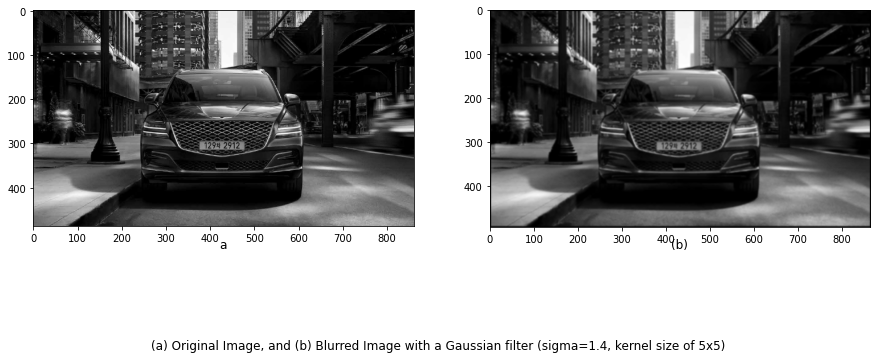

In [15]:
from skimage import io
from skimage import color
from scipy import signal
from matplotlib import pyplot as plt

originalImage = color.rgb2gray(io.imread('/content/AP_Test_OPEN/GV80.png'))
gKernel = gaussian_kernel(5,1.4)
blurImage = signal.convolve2d(originalImage, gKernel)

fig, axs = plt.subplots(1, 2, figsize=(15, 6.5))
axs[0].imshow(originalImage, cmap= 'gray')
axs[0].text(0.5,  -0.1, 'a', size=12, ha='center', transform=axs[0]. transAxes)
axs[1].imshow(blurImage, cmap='gray')
axs[1].text(0.5, -0.1, '(b)',size=12,ha='center', transform=axs[1]. transAxes)
txt = '(a) Original Image, and (b) Blurred Image with a Gaussian filter (sigma=1.4, kernel size of 5x5)'
plt.figtext(0.5, 0.01, txt, wrap=True, ha='center', fontsize=12)

## 2. Gradient Calculation

The Gradient calculation step detects the edge intensity and direction by calculation the gradient of the image using edge detection operators.

Edges coorespond

Edges correspond to a change of pixel's intensity.
To detect it, the easiest way is to apply filters that highlight this intensity change in both directions: horizontal (x) and vertical (y)

When the image is smmthed, the derivatives $I_x$ and$I_y$ w.r.t. $x$ and $y$ are calculated. It can be implemented by convolving $I$ with **SOVEL** Kernels $K_x$ and $K_y$, respectively:

\begin{equation*}
K_x = \left(\begin{array}{ccc}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 &1 \end{array} \right) ,
K_y = \left(\begin{array}{ccc}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1 \end{array} \right)
\end{equation*}

Then, the magnitude $G$ and the slope $\theta$ of the gradient are calculated as follow:

\begin{equation*}
\left |G \right| = \sqrt{I_x^2 + I_y^2}, \\
\theta(x,y) = \arctan\left( \frac{I_y}{I_x}\right)
\end{equation*}

Below is how the sobel filters are applied to the image, and how to get both intensity and edge direction matrices:









In [19]:
from scipy import ndimage
## Multi-dimensional image processing
from matplotlib import gridspec
# Customizing Figure Layouts

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0 ,1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)

    G = np.hypot(Ix, Iy)
    G = G/G.max() * 255 # 0~255
    theta = np.arctan2(Iy, Ix)

    return (G, theta)

print('Definition of Sobel Filter')

Definition of Sobel Filter


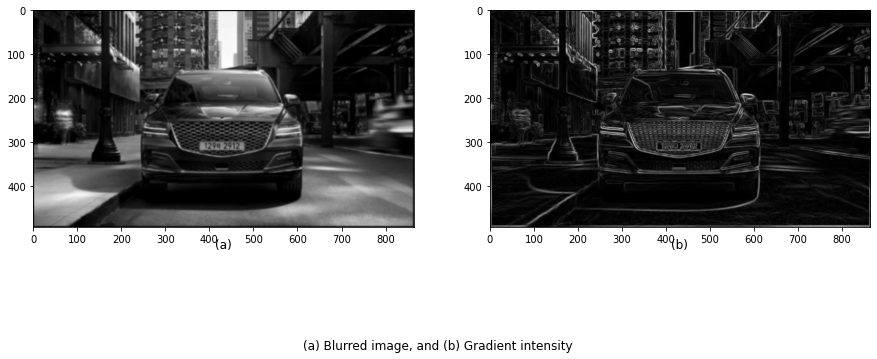

In [21]:
gradMag, gradDir = sobel_filters(blurImage)

fig, axs = plt.subplots(1, 2, figsize=(15, 6.5))
axs[0].imshow(blurImage, cmap='gray')
axs[0].text(0.5, -0.1, '(a)', size=12, ha='center', transform=axs[0].transAxes)
axs[1].imshow(gradMag, cmap='gray')
axs[1].text(0.5, -0.1, '(b)', size=12, ha='center', transform=axs[1].transAxes)
txt = '(a) Blurred image, and (b) Gradient intensity'
plt.figtext(0.5, 0.01, txt, wrap=True, ha='center', fontsize=12)
plt.show()

The results is almost the expected one, but we can see that some of the edge are thick and others are thin.
Non-Max Suppression step will help us mitigate the thick ones.
Moreover, the gradient intensity level is between 0 and 255 which is not uniform. The edges on the final results should have the same intensity (i-e. white pixel = 255).

## 3. Non-Maxinum Suppression

Idealy, the final image should have thin edges. 
Thus, we must perform non-maximum suppression to thin out the edges.

The principle is simple: thd algorithm goes through all the point on the gradient intensity matrix and finds the pixels with the maximum value in the edge direction.

Let's take two examples:

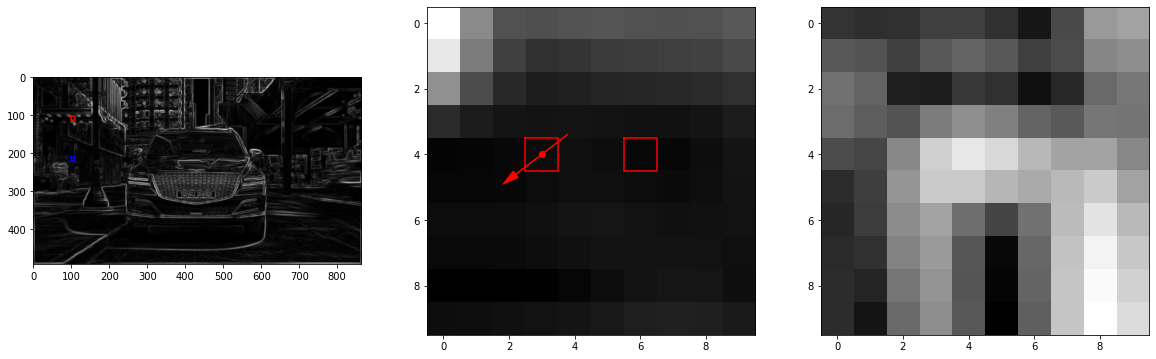

In [29]:
# for testing
# two sampe cases for easy understanding
sPt = [102, 100, 210, 100] # y1,x1, y2, x2
sSize = 10
f1 = gradMag[sPt[0]:sPt[0]+sSize, sPt[1]:sPt[1]+sSize]
th1 = gradDir[sPt[0]:sPt[0]+sSize, sPt[1]:sPt[1]+sSize]
f2 = gradMag[sPt[2]:sPt[2]+sSize, sPt[3]:sPt[3]+sSize]
th2 = gradDir[sPt[2]:sPt[2]+sSize, sPt[3]:sPt[3]+sSize]

def drawBox(ax, xp, yp, size, color):
    ax.plot([xp, xp+size, xp+size, xp, xp], [yp, yp, yp+size, yp+size, yp], color=color)

def drawArrow(ax, xp, yp, length, theta, color):
    hl = length /2 #half length of arrow
    dx = np.cos(theta)
    dy = -np.sin(theta) #Minus due to the reverse y-axis
    ax.scatter([xp], [yp], color=color)
    ax.arrow(xp-hl*dx, yp-hl*dy, length*dx, length*dy, head_width=0.25, head_length=0.5, color=color)

fig, axs = plt.subplots(1,3,figsize=(20, 6.5))
axs[0].imshow(gradMag, cmap='gray')
drawBox(axs[0], sPt[1], sPt[0], sSize, 'red')
drawBox(axs[0], sPt[3], sPt[2], sSize, 'blue')

axs[1].imshow(f1, cmap= 'gray')
pts = [3,4,6,4] # x1, y1, x2, y2
drawBox(axs[1], pts[0]-0.5, pts[1]-0.5,1, 'red')
drawArrow(axs[1], pts[0], pts[1], 2, th1[pts[1], pts[0]], 'red')
drawBox(axs[1], pts[2]-0.5, pts[3]-0.5, 1, 'red')

axs[2].imshow(f2, cmap='gray')
plt.show()